# Cleaning Data in Pandas DataFrames

## 1. Import libraries and dependencies

In [1]:
# Import the pandas and pathlib libraries
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt

## 2. Create a Path to the File Using Pathlib

In [2]:
# Use the Pathlib libary to set the path to the CSV
csv_path = Path("../Resources/people_reordered.csv")

## 3. Read the CSV into a Pandas DataFrame

In [3]:
# Use the file path to read the CSV into a DataFrame and display a few rows
people_df = pd.read_csv(csv_path)
people_df.head()

,Unnamed: 0,Person_ID,Last_Name,First_Name,Gender,University,Occupation,Salary,Email,Age
0,0,1.0,Lenormand,Keriann,Female,Aurora University,Nurse Practicioner,58135.0,klenormand0@businessinsider.com,27
1,1,2.0,Rupke,Huntley,Male,Osaka University of Economics,Project Manager,96053.0,hrupke1@reuters.com,22
2,2,3.0,Dalgarnowch,Gorden,Male,Ludong University,Environmental Tech,59196.0,gdalgarnowch2@microsoft.com,40
3,3,4.0,NaN,Cullie,Male,Université des Sciences et de la Technologie d...,Legal Assistant,88493.0,cputten3@nymag.com,62
4,4,5.0,Strangman,Ariel,Female,Boise State University,Project Manager,89073.0,astrangman4@bravesites.com,47


## 4. View Column Data Types

In [4]:
# Use the `dtypes` attribute to list the column data types
people_df.dtypes

Unnamed: 0      int64
Person_ID     float64
Last_Name      object
First_Name     object
Gender         object
University     object
Occupation     object
Salary        float64
Email          object
Age             int64
dtype: object

## 5. Drop Extraneous Columns

In [5]:
# Use the `drop` function to drop specific columns
people_df.drop(columns=['Unnamed: 0'], inplace=True)
people_df.head()

,Person_ID,Last_Name,First_Name,Gender,University,Occupation,Salary,Email,Age
0,1.0,Lenormand,Keriann,Female,Aurora University,Nurse Practicioner,58135.0,klenormand0@businessinsider.com,27
1,2.0,Rupke,Huntley,Male,Osaka University of Economics,Project Manager,96053.0,hrupke1@reuters.com,22
2,3.0,Dalgarnowch,Gorden,Male,Ludong University,Environmental Tech,59196.0,gdalgarnowch2@microsoft.com,40
3,4.0,NaN,Cullie,Male,Université des Sciences et de la Technologie d...,Legal Assistant,88493.0,cputten3@nymag.com,62
4,5.0,Strangman,Ariel,Female,Boise State University,Project Manager,89073.0,astrangman4@bravesites.com,47


---

## 6. Identify Data Quality Issues

### 1. Identify the Number of Rows

In [6]:
# Use the `count` function to view count of non-null values for each column
people_df.count()

Person_ID      996
Last_Name      990
First_Name     993
Gender         998
University     991
Occupation     998
Salary         998
Email          992
Age           1000
dtype: int64

### 2. Identify Frequency Counts of a Specific Column

In [7]:
# Identifying frequency counts of the `first_name` column
people_df['First_Name'].value_counts()

Ailbert      3
Israel       3
Gilles       2
Garv         2
Fanny        2
            ..
Gan          1
Geno         1
Fiona        1
Frannie      1
Stillmann    1
Name: First_Name, Length: 914, dtype: int64

### 3. Identify Null Values

In [8]:
# Checking for null
people_df.isnull()

,Person_ID,Last_Name,First_Name,Gender,University,Occupation,Salary,Email,Age
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
995,False,False,False,False,False,False,False,False,False
996,False,False,False,False,False,False,False,False,False
997,False,False,False,False,False,False,False,False,False
998,False,False,False,False,False,False,False,False,False


### 4. Determine the Number of Nulls

In [9]:
# Determining number of nulls
people_df.isnull().sum()

Person_ID      4
Last_Name     10
First_Name     7
Gender         2
University     9
Occupation     2
Salary         2
Email          8
Age            0
dtype: int64

### 5. Determining the Percentage of Nulls for each Column

In [10]:
# Determining percentage of nulls
people_df.isnull().sum() / len(people_df) * 100

Person_ID     0.4
Last_Name     1.0
First_Name    0.7
Gender        0.2
University    0.9
Occupation    0.2
Salary        0.2
Email         0.8
Age           0.0
dtype: float64

### 6. Check for Duplicate Rows

In [11]:
# Use the `duplicated` function to determine the existance of duplicate rows: True or False
people_df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999     True
Length: 1000, dtype: bool

### 7. Check for Duplicate `first_name` Values

In [12]:
# Use the `duplicated` function in conjunction with a list of columns to 
# determine the existence of duplicate rows based on the selected columns
people_df[['First_Name', 'Last_Name']].duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999     True
Length: 1000, dtype: bool

---

## 7. Resolve Data Quality Issues

### 1. Fill First_Name and Last_Name Null Values with Default Value "Unnamed"

In [13]:
# Cleanse nulls from DataFrame by filling na
people_df['First_Name'] = people_df['First_Name'].fillna("Unnamed")
people_df['Last_Name'] = people_df['Last_Name'].fillna("Unnamed")
people_df

,Person_ID,Last_Name,First_Name,Gender,University,Occupation,Salary,Email,Age
0,1.0,Lenormand,Keriann,Female,Aurora University,Nurse Practicioner,58135.0,klenormand0@businessinsider.com,27
1,2.0,Rupke,Huntley,Male,Osaka University of Economics,Project Manager,96053.0,hrupke1@reuters.com,22
2,3.0,Dalgarnowch,Gorden,Male,Ludong University,Environmental Tech,59196.0,gdalgarnowch2@microsoft.com,40
3,4.0,Unnamed,Cullie,Male,Université des Sciences et de la Technologie d...,Legal Assistant,88493.0,cputten3@nymag.com,62
4,5.0,Strangman,Ariel,Female,Boise State University,Project Manager,89073.0,astrangman4@bravesites.com,47
...,...,...,...,...,...,...,...,...,...
995,996.0,Crumpton,Meta,Female,ECAM - Institut Supérieur Industriel,Registered Nurse,57060.0,mcrumptonrn@qq.com,52
996,997.0,Gilford,Gunar,Male,Smolny University,Marketing Manager,76109.0,ggilfordro@yandex.ru,32
997,998.0,Gurling,Lucretia,Female,Institut Teknologi Telkom,Software Engineer III,92115.0,lgurlingrp@de.vu,48
998,999.0,Yang,Andrew,Male,Rutgers University School of Business,Curriculum Engineer,60000.0,ayang@codedrills.com,53


### 2. Drop Remaining Records with Nulls from DataFrame

In [14]:
# Use the `dropna` function to drop whole records that have at least one null value
people_df.dropna(inplace=True)
people_df

,Person_ID,Last_Name,First_Name,Gender,University,Occupation,Salary,Email,Age
0,1.0,Lenormand,Keriann,Female,Aurora University,Nurse Practicioner,58135.0,klenormand0@businessinsider.com,27
1,2.0,Rupke,Huntley,Male,Osaka University of Economics,Project Manager,96053.0,hrupke1@reuters.com,22
2,3.0,Dalgarnowch,Gorden,Male,Ludong University,Environmental Tech,59196.0,gdalgarnowch2@microsoft.com,40
3,4.0,Unnamed,Cullie,Male,Université des Sciences et de la Technologie d...,Legal Assistant,88493.0,cputten3@nymag.com,62
4,5.0,Strangman,Ariel,Female,Boise State University,Project Manager,89073.0,astrangman4@bravesites.com,47
...,...,...,...,...,...,...,...,...,...
995,996.0,Crumpton,Meta,Female,ECAM - Institut Supérieur Industriel,Registered Nurse,57060.0,mcrumptonrn@qq.com,52
996,997.0,Gilford,Gunar,Male,Smolny University,Marketing Manager,76109.0,ggilfordro@yandex.ru,32
997,998.0,Gurling,Lucretia,Female,Institut Teknologi Telkom,Software Engineer III,92115.0,lgurlingrp@de.vu,48
998,999.0,Yang,Andrew,Male,Rutgers University School of Business,Curriculum Engineer,60000.0,ayang@codedrills.com,53


### 3. Check Null Counts for Each Column (Again)

In [15]:
# Use the `isnull` function in conjunction with the `sum` function to count the number of null values for each column
people_df.isnull().sum()

Person_ID     0
Last_Name     0
First_Name    0
Gender        0
University    0
Occupation    0
Salary        0
Email         0
Age           0
dtype: int64

### 4. Cleanse data by Dropping Duplicates

In [16]:
# Use the `drop_duplicates` function with the `subset` parameter to 
# drop duplicates based on a selection of columns
people_df.drop_duplicates(subset=['Last_Name', 'First_Name'])

,Person_ID,Last_Name,First_Name,Gender,University,Occupation,Salary,Email,Age
0,1.0,Lenormand,Keriann,Female,Aurora University,Nurse Practicioner,58135.0,klenormand0@businessinsider.com,27
1,2.0,Rupke,Huntley,Male,Osaka University of Economics,Project Manager,96053.0,hrupke1@reuters.com,22
2,3.0,Dalgarnowch,Gorden,Male,Ludong University,Environmental Tech,59196.0,gdalgarnowch2@microsoft.com,40
3,4.0,Unnamed,Cullie,Male,Université des Sciences et de la Technologie d...,Legal Assistant,88493.0,cputten3@nymag.com,62
4,5.0,Strangman,Ariel,Female,Boise State University,Project Manager,89073.0,astrangman4@bravesites.com,47
...,...,...,...,...,...,...,...,...,...
994,995.0,Jeacop,Iggy,Male,University of Greenwich,Sales Associate,82726.0,ijeacoprm@4shared.com,22
995,996.0,Crumpton,Meta,Female,ECAM - Institut Supérieur Industriel,Registered Nurse,57060.0,mcrumptonrn@qq.com,52
996,997.0,Gilford,Gunar,Male,Smolny University,Marketing Manager,76109.0,ggilfordro@yandex.ru,32
997,998.0,Gurling,Lucretia,Female,Institut Teknologi Telkom,Software Engineer III,92115.0,lgurlingrp@de.vu,48


### 5. Convert Columns to Different DataTypes

In [17]:
# Use the `as_type` function to convert `Person_ID` from `float` to `int`
people_df['Person_ID'] = people_df['Person_ID'].astype('int')
people_df

,Person_ID,Last_Name,First_Name,Gender,University,Occupation,Salary,Email,Age
0,1,Lenormand,Keriann,Female,Aurora University,Nurse Practicioner,58135.0,klenormand0@businessinsider.com,27
1,2,Rupke,Huntley,Male,Osaka University of Economics,Project Manager,96053.0,hrupke1@reuters.com,22
2,3,Dalgarnowch,Gorden,Male,Ludong University,Environmental Tech,59196.0,gdalgarnowch2@microsoft.com,40
3,4,Unnamed,Cullie,Male,Université des Sciences et de la Technologie d...,Legal Assistant,88493.0,cputten3@nymag.com,62
4,5,Strangman,Ariel,Female,Boise State University,Project Manager,89073.0,astrangman4@bravesites.com,47
...,...,...,...,...,...,...,...,...,...
995,996,Crumpton,Meta,Female,ECAM - Institut Supérieur Industriel,Registered Nurse,57060.0,mcrumptonrn@qq.com,52
996,997,Gilford,Gunar,Male,Smolny University,Marketing Manager,76109.0,ggilfordro@yandex.ru,32
997,998,Gurling,Lucretia,Female,Institut Teknologi Telkom,Software Engineer III,92115.0,lgurlingrp@de.vu,48
998,999,Yang,Andrew,Male,Rutgers University School of Business,Curriculum Engineer,60000.0,ayang@codedrills.com,53


## 8. Plot data with Seaborn

<AxesSubplot:xlabel='Age', ylabel='Salary'>

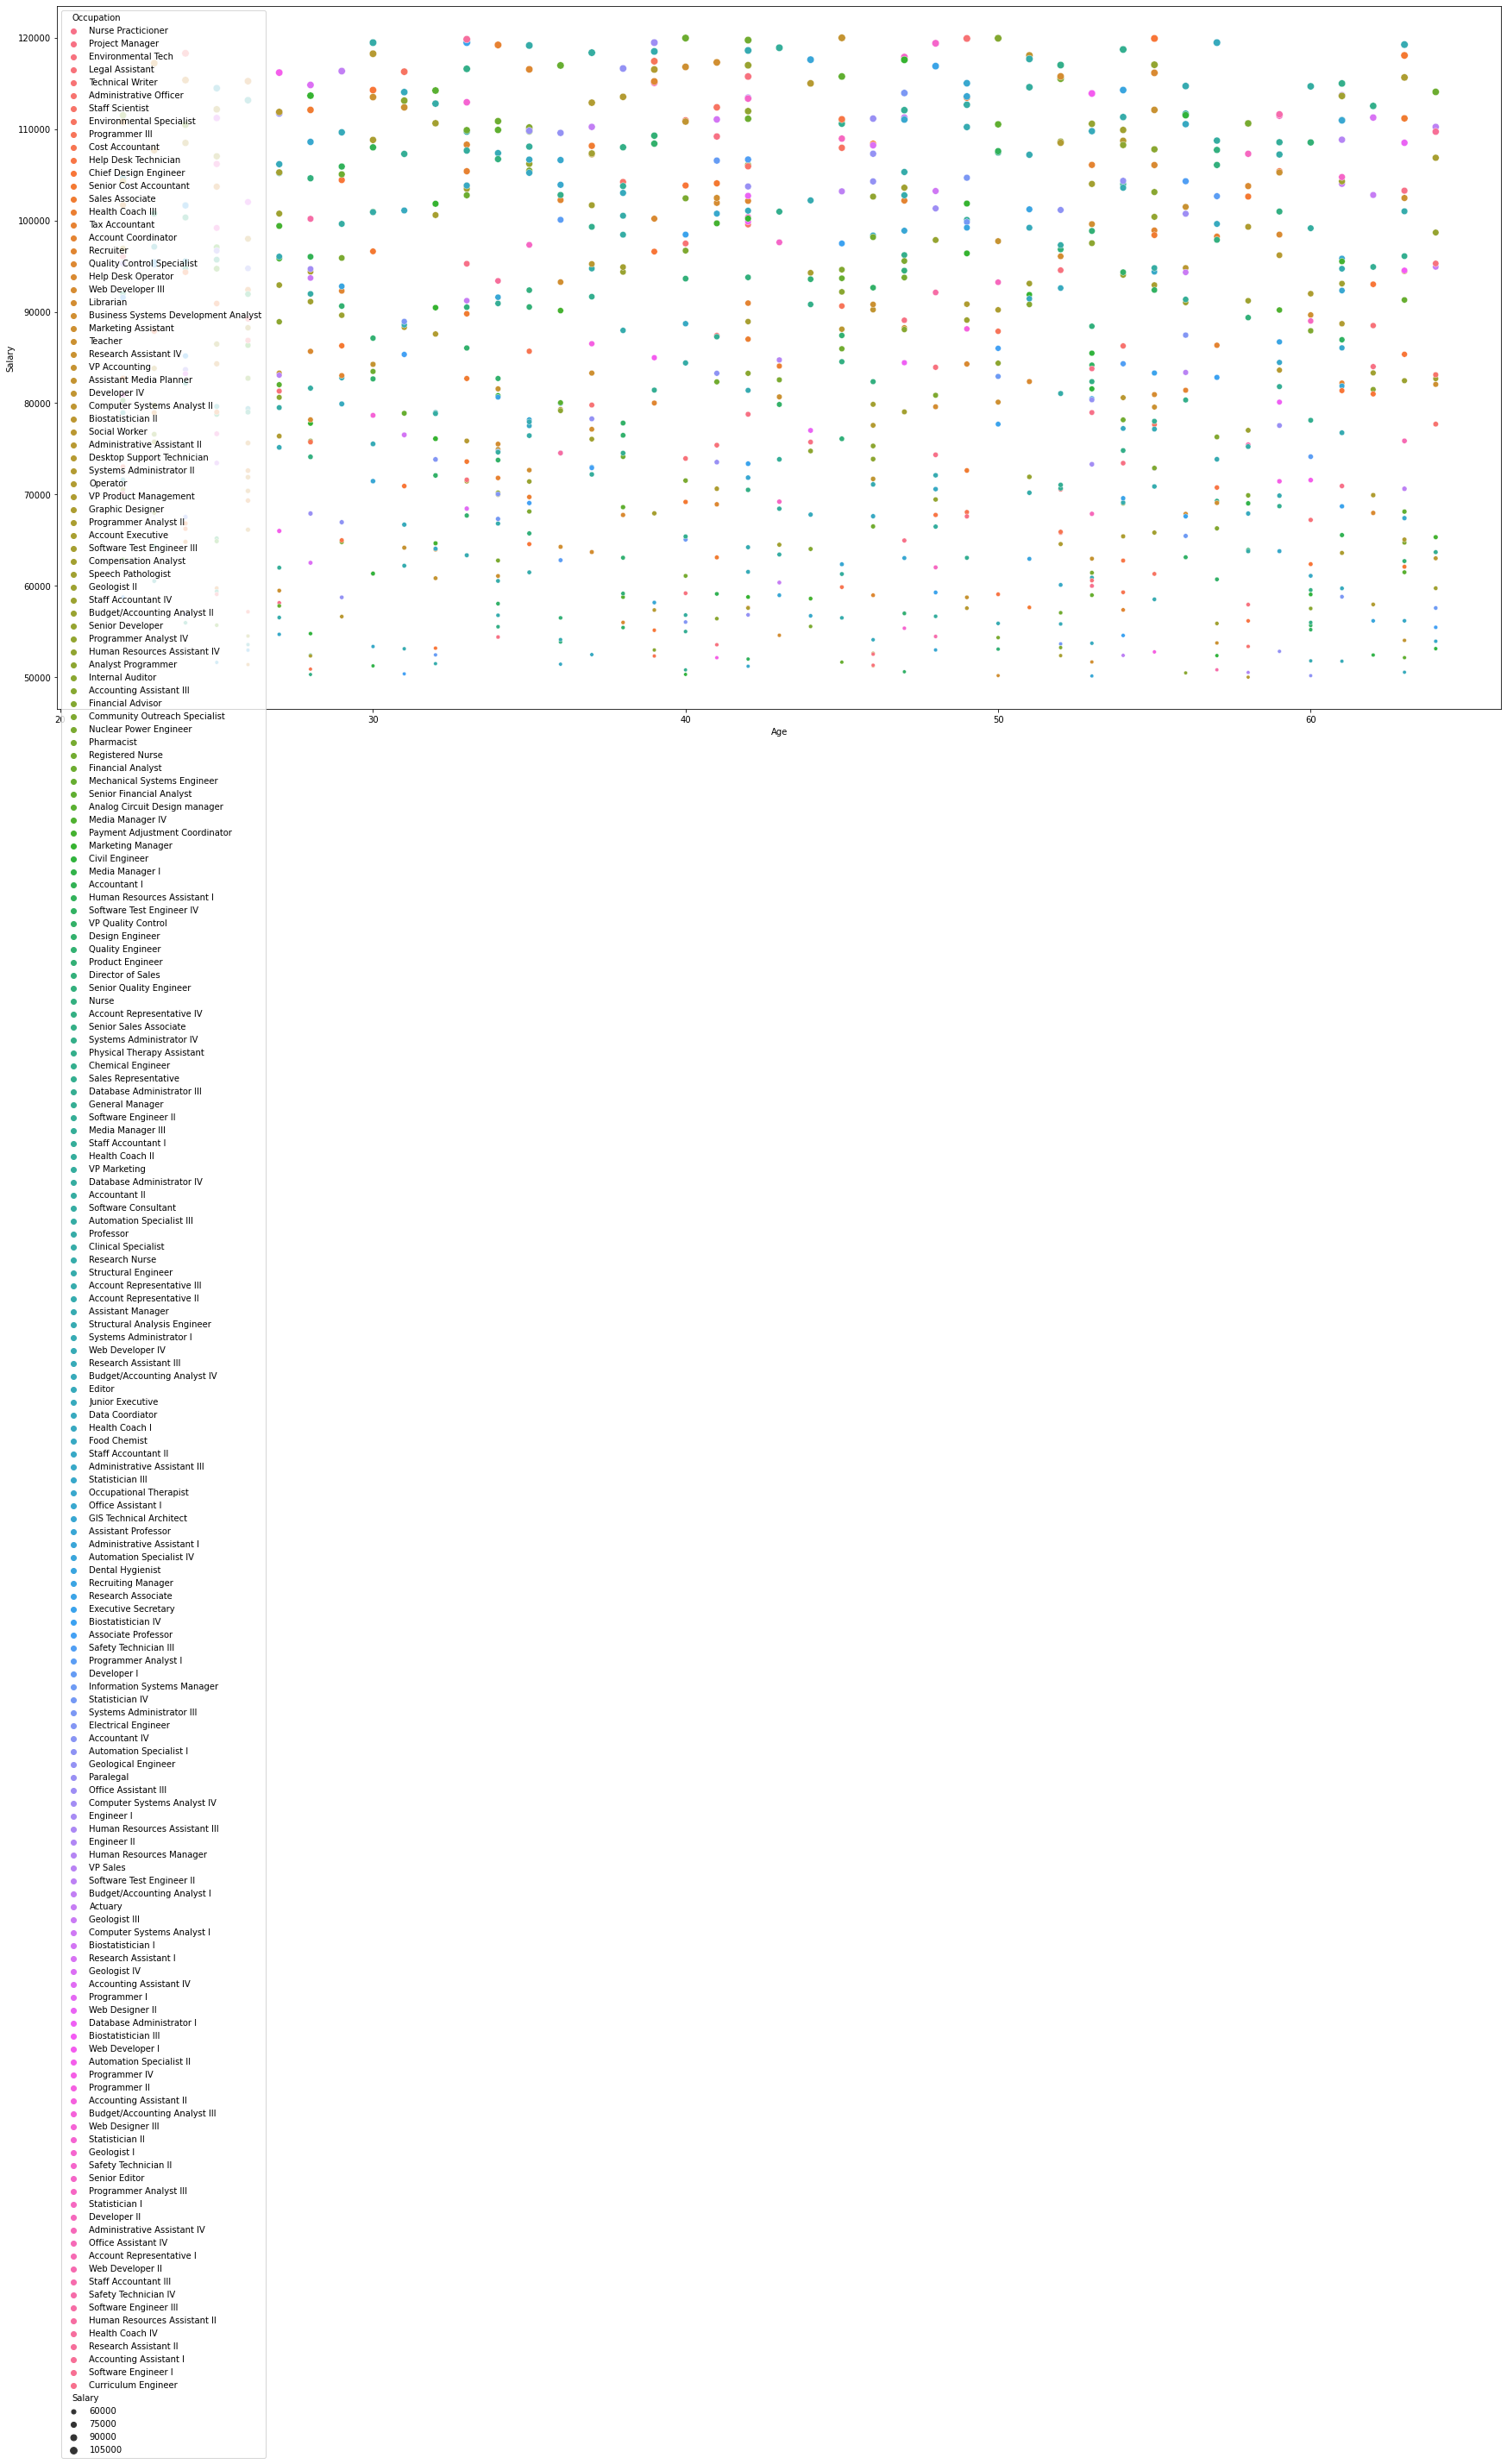

In [21]:
plt.figure(figsize=(30,15))
sns.scatterplot(data=people_df, x='Age', y='Salary',  size = 'Salary', hue ='Occupation')

## 9. Save Cleansed Data to New CSV

In [19]:
# Save modified DataFrame to the Resources folder. 
# Use the `index` parameter set to `False` to exclude saving the index.
people_df.to_csv("../Resources/people_cleansed.csv", index=False)